## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

2024-04-24 14:15:15.458533: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Warstwa splotowa - ang. convlolution layer.

Analiza obrazu o rozdzielczości 10M pikseli z użyciem sieci w pełni połączonej wymaga 

$$
{\huge
(10M +1)\times N_\text{neuronów}
}
$$

wag już w pierwszej warstwie ukrytej. Taka duża liczba wag jest trudna w treningu. W szczególności jest podatna na przetrenowanie, co widać na przykładzie zbioru MNIST.

W 1998 roku zaproponowano architekturę z warstwami współdzielącymi wagi - [LeNet](https://ieeexplore.ieee.org/document/726791).
Warstwy ze współdzieleniem wag są obecnie nazywane warstwami splotowymi, ang. `convolution layer`. Sieci wykorzystujące takie warstwy to 
sieci konwolucyjne, ang. `convolution neural network, CNN`

Źródło rysunków: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

- **jądro, ang. `kernel/filter`** - zbiór wag wspólny dla całego obrazu. Jądro zwykle ma podstać macierzy kwadratowej.

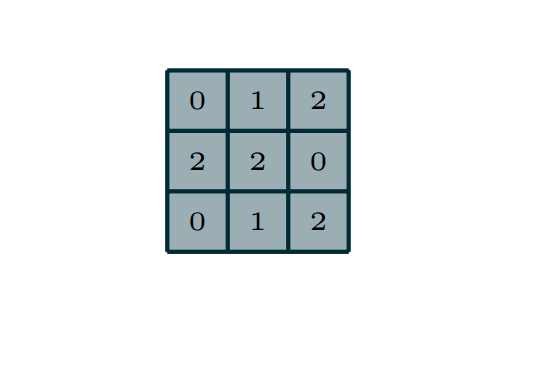

- **pole recepcyjne** - obszar objęty zbiorem różnych wag. Pole recepcyjne przesuwa się po obrazie

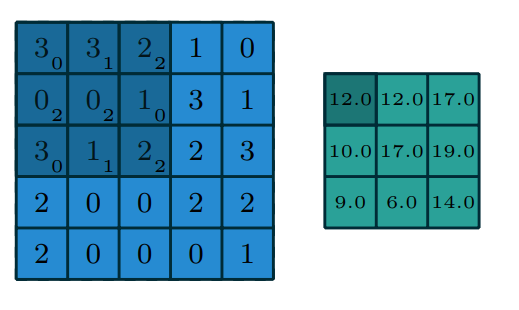

* **krok, ang. stride** - liczba indeksów o jakie przesuwa się pole recepcyjne. Tutaj `stride=1`

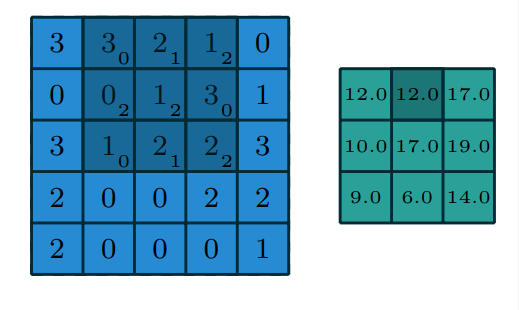


* **wypełnienie, ang. padding** - sposób rozszerzenia obrazu w celu uzyskania pożądanego kształtu wyniku warstwy konwolucyjnej, np. zachowania tego samego kształtu dla kolejnych warstw konwolucyjnych. Tutaj: wypełnienie zerami, ang. `zero padding`.

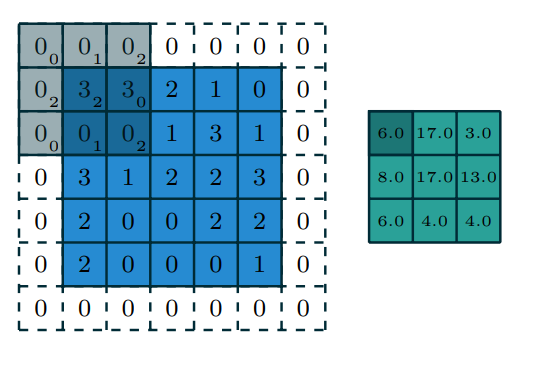


* **dylatacja** - odstęp między elementami pola recepcyjnego. Odstęp wynosi `d-1` - czyli brak odstępu odpowiada `d=1`

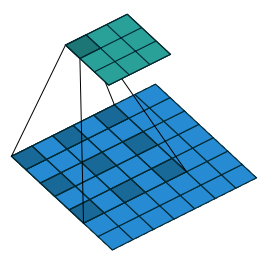

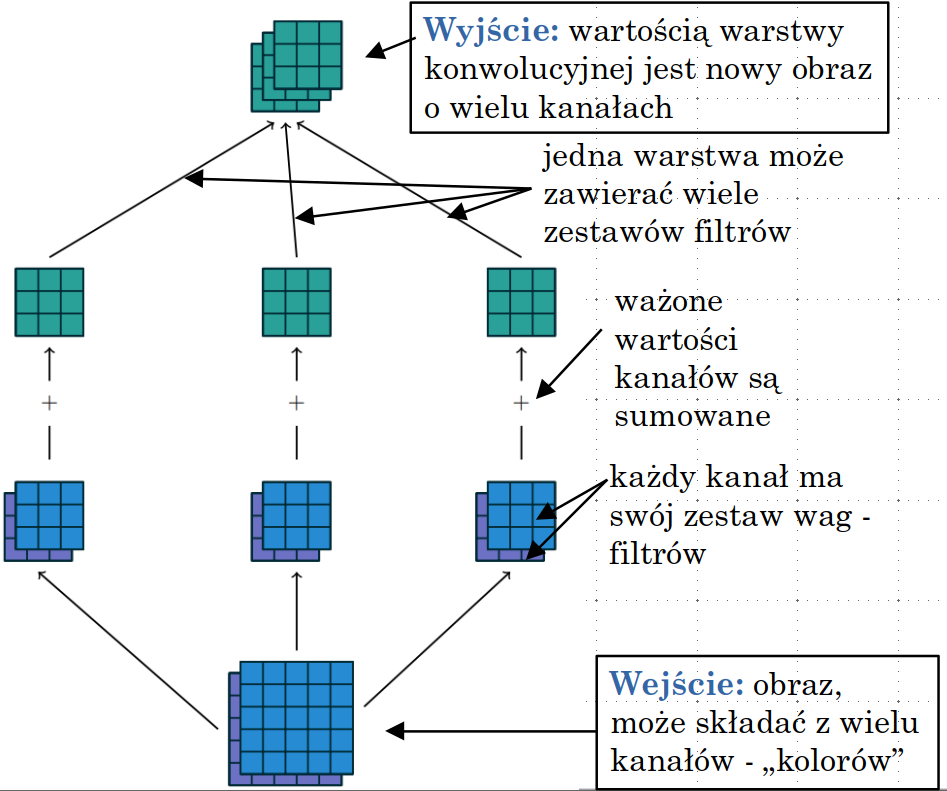

Interfejs użytkownika warstwy splotowej w Keras:

```Python
tf.keras.layers.Conv2D(
    filters,                    # liczba filtrów
    kernel_size,                # rozmiar filtra: krotka (n,m), lub (n) dla filtrów kwadratowych
    strides=(1, 1),             # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia: 
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, H, W).
                                # dopełnienie wynosi połowę rozmiaru filtra w odpowiednim kierunku
    data_format=None,           # specyfikacja kolejności wymiarów: 
                                # "channels_first" - (batch size, liczba kanałów, H, W)
                                # "channels_last" - (batch size, H, W, liczba kanałów) <-- domyślne w TF
    dilation_rate=(1, 1),       # dylatacja (n,m) - splot bierze co (n-1, m-1) element w polu recepcyjnym 
    groups=1,                   # liczebność grup kanałów, które mają wspólne wagi.
    ...                         # pozostałe, standardowe argumenty warstwy: inicjalizacja wag, regularyzacja, itd. 
)
```

**Uwaga:** warstwy w środowisku `Keras` zakładają, że dane wejściowe są podawane w postaci paczek, `batches`. 

**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i pozostałych parametrach z domyślnymi wartościami
* podać na jej wejściu rysunek o rozmiarze `(16,16)` wypełniony jedynkami
* wypisać na ekran kształt wejścia i wyjścia warstwy

**Wskazówki:** 
* uwaga na kształt danych wejściowych : `(batch size, height, width, channels)`

In [2]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3))
data = np.full((1,16,16, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)
#END_SOLUTION
pass

Input shape: (1, 16, 16, 1)


2024-04-24 14:15:17.293812: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 14:15:17.293934: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 14:15:17.297963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Output shape: (1, 14, 14, 1)


**Proszę**:

* zbudować warstwę splotową z jednym filtrem o rozmiarze `(3,3)` i wypełnianiem ustawionym na `same`
* podać na jej wejściu wypełniony jedynkami rysunek o rozmiarze `(16,16)` i jednym kanale kolorów
* wypisać na ekran kształt wejścia i wyjścia warstwy

In [3]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3), padding='same')
data = np.full((1,16,16, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)
#END_SOLUTION
pass

Input shape: (1, 16, 16, 1)
Output shape: (1, 16, 16, 1)


**Proszę:**

* wydobyć z warstwy splotowej macierz filtra (czyli wagi warstwy) i wypisać ją na ekran
* wypisać jej wartości
* zadać nowy filtr w postaci:

$$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
}
$$
* uruchomić filtr na macierzy `(3,3)` wypełnionej zerami z oboma wariantami wypełniania: `valid` i `same`

**Wskazówki:**
* uwaga na kształt danych wejściowych : `(batch, height, width, channels)`
* uwaga na kształt macierzy filtrów
* proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:
* TF 2.16.1: proszę użyć własnej klasy inicjalizującej wagi na zadaną macierz:
* TF <2.16.1: proszę użyć inicjalizatora wag `tf.keras.initializers.Constant(...)`

In [4]:
try: 
    class customInitializer(tf.keras.Initializer):
        def __init__(self, kernel):
            self.kernel = kernel

        def __call__(self, shape, dtype=None, **kwargs):
            x = tf.reshape(self.kernel, shape)
            x= tf.cast(x, dtype)
            return x  
except AttributeError:
    print(colored("tf.keras.Initializer not available","red"))
    print(colored("TF version:","blue"),tf.__version__)
    pass

In [5]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2D(filters = 1, kernel_size=(3,3), padding='same')
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
print(colored("kernel value:","blue"),layer.weights[0][:,:,0,0])

kernel = np.array([[0.0, 1.0, 0.0],
                   [1.0, 0.0, 1.0],
                   [0.0, 1.0, 0.0]])

layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), 
                               activation='linear',
                               padding="same",
                               kernel_initializer = customInitializer(kernel),
                               use_bias=False)

data = np.full((1,3,3,1), 1.0)
layer(data)
print(colored("kernel shape:","blue"),layer.weights[0].shape)
print(colored("kernel value:\n","blue"),layer.weights[0][:,:,0,0])
print(colored("Input:\n","blue"), data[0,:,:,0])
print(colored("Output with same padding:\n","blue"), layer(data)[0,:,:,0])

layer.padding = 'valid'
print(colored("Output with valid padding:\n","blue"), layer(data)[0,:,:,0])
#END_SOLUTION
pass

kernel shape: (3, 3, 1, 1)
kernel value: tf.Tensor(
[[-0.04546571 -0.51170915  0.1456706 ]
 [ 0.05987173 -0.23409525  0.5764611 ]
 [ 0.06725436  0.19691336  0.31640482]], shape=(3, 3), dtype=float32)
kernel shape: (3, 3, 1, 1)
kernel value:
 tf.Tensor(
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]], shape=(3, 3), dtype=float32)
Input:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Output with same padding:
 tf.Tensor(
[[2. 3. 2.]
 [3. 4. 3.]
 [2. 3. 2.]], shape=(3, 3), dtype=float32)
Output with valid padding:
 tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


Przygotujmy rysunek o rozmiarze `(32,32)` z losowo umieszczonymi kwadratami `(3,3)`

Kształty wygenerujemy z użyciem funkcji `skimage.draw.random_shapes`.

Image shape: (32, 32)


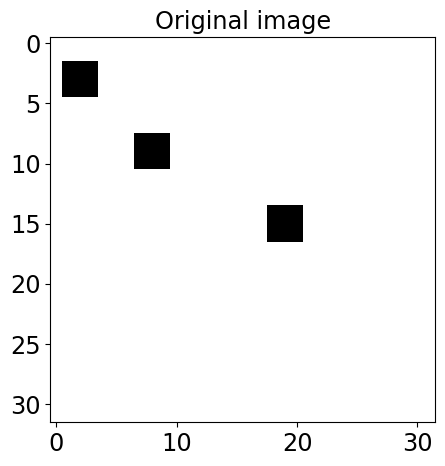

In [6]:
from skimage.draw import random_shapes
result = random_shapes((32, 32), max_shapes=3, 
                       shape='rectangle', 
                       min_size = 3,
                       max_size = 3,
                       intensity_range = (1,1),
                       channel_axis=None, rng=0)
image, labels = result

#Change colors: background - white, shapes - black
image = np.where(image==255, 0, image).astype(np.float32)
print(colored("Image shape:","blue"),image.shape)

fig, axis = plt.subplots(1, 1, figsize=(5,5))
axis.imshow(image, cmap='binary')
axis.set_title('Original image');

**Proszę:**

* przygotować warstwy splotowe z dwoma filtrami **w jednej warstwie**:
    * kwadratowym:
$$
\Large{
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
}
$$    
    * liniowym
  $$
\Large{
\begin{bmatrix}
0 & 1 & 0\\
0 & 1 & 0 \\
0 & 1 & 0
\end{bmatrix}
}
$$ 

* wykonać operację warstwy na rysunkach z kwadratami
* narysować oryginalny rysunek i rysunki powstałe na wyjściu obu filtrów

**Wskazówki:**
* uwaga na kształt danych wejśćiowych - trzeba dodać wymiary `batch` i `channel`
* macierze dla dwu filtrów można uzyskać przez składanie macierzy dla pojedynczych filtrów:
  ```Python
  
  kernel = np.stack( (rect_kernel, linear_kernel), axis=2)
  ```
  <br></br>
* proszę sprawdzić kształt wyniku zwróconego przez warstwę splotową 

Maximal pixel value for square filter: 8.0
Maximal pixel value for linear filter: 3.0


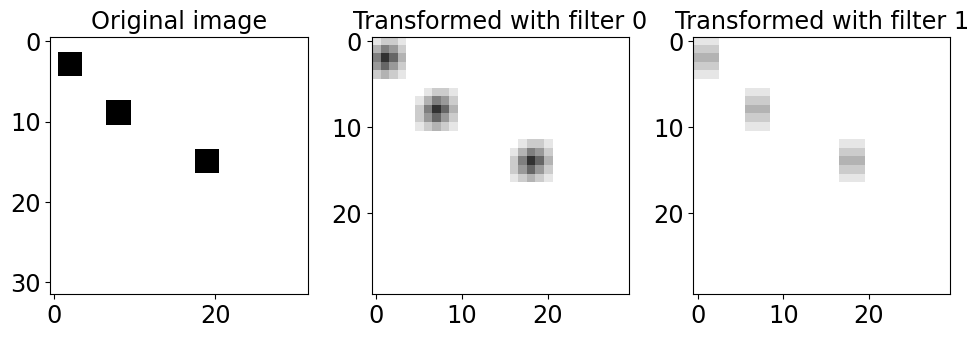

In [7]:
#BEGIN_SOLUTION
rect_kernel = np.array([[1.0, 1.0, 1.0],
                        [1.0, 1.0, 1.0],
                        [1.0, 1.0, 0.0]])

linear_kernel = np.array([[0.0, 1.0, 0.0],
                        [0.0, 1.0, 0.0],
                        [0.0, 1.0, 0.0]])
kernel = np.stack( (rect_kernel, linear_kernel), axis=2)

layer = tf.keras.layers.Conv2D(2, (3, 3), 
                               activation='linear',
                               padding="valid",
                               kernel_initializer = customInitializer(kernel),
                               use_bias=False)

fig, axes = plt.subplots(1, 3, figsize=(10,10))
axes[0].imshow(image, cmap='binary')
axes[0].set_title('Original image');

# add batch and channel dimensions by reshape
#data = image.reshape(1,32,32,1)
# add batch and channel dimentions by expanding
data = np.expand_dims(image, axis=0)
data = np.expand_dims(data, axis=3)

layer_output = layer(data)
print(colored("Maximal pixel value for square filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,0]).numpy())
print(colored("Maximal pixel value for linear filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,1]).numpy())
threshold = tf.math.reduce_max(layer_output[0,:,:,1]).numpy()

axes[1].imshow(layer_output[0,:,:,0], cmap='binary', vmin=0, vmax=10)
axes[1].set_title('Transformed with filter 0');

axes[2].imshow(layer_output[0,:,:,1], cmap='binary', vmin=0, vmax=10)
axes[2].set_title('Transformed with filter 1');

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.25, hspace=0.25)
#END_SOLUTION
pass

**Proszę:**

* wypisać na ekran maksymalne wartości pikseli dla kanałów wyjściowego obrazu
* narysować wyjściowe obrazy zachowując piksele o wartości powyżej maksymalnej dla kanału z filtrem liniowym. Zachowane piksele proszę ustawić na wartość `1`

**Wskazówki:**
* maksymalną wartość macierzy można uzyskać przez funkcję `tf.math.reduce_max(...).numpy()`
* piksele można zachować u ustawić na wartość `1` wypisując warunek logiczny na ich warość

Maximal pixel value for square filter: 8.0
Maximal pixel value for linear filter: 3.0


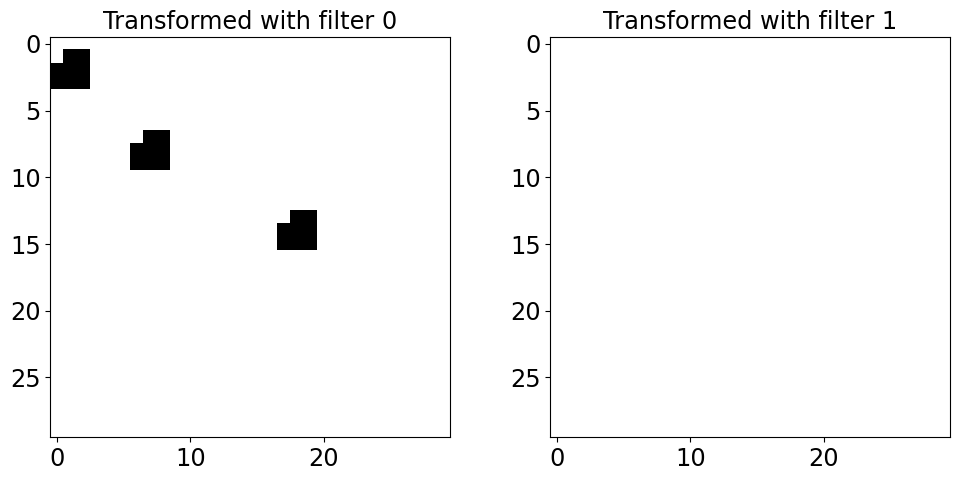

In [8]:
#BEGIN_SOLUTION
fig, axes = plt.subplots(1, 2, figsize=(10,10))

print(colored("Maximal pixel value for square filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,0]).numpy())
print(colored("Maximal pixel value for linear filter:","blue"), tf.math.reduce_max(layer_output[0,:,:,1]).numpy())
threshold = tf.math.reduce_max(layer_output[0,:,:,1]).numpy()

axes[0].imshow(layer_output[0,:,:,0]>threshold, cmap='binary', vmin=0, vmax=1)
axes[0].set_title('Transformed with filter 0');

axes[1].imshow(layer_output[0,:,:,1]>threshold, cmap='binary', vmin=0, vmax=1)
axes[1].set_title('Transformed with filter 1');
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.25, hspace=0.25)
#END_SOLUTION
pass

Warstwy splotowe generują nowe obrazy. Zwykle rozdzielczość nowego obrazu jest taka jak obrazu wejściowego, ale liczba kanałów, "kolorów/kanałów" wzrasta. 
Redukcja rozdzielczości jest uzyskiwana przez warstwy łączące, ang. `pooling layers`. 

Warstwy łączące mają podobnie jak dla warstwy konwolucyjnej wąskie pole recepcyjne, ale warstwy łączące nie mają żadnych wag, czyli parametrów podlegających treningowi - ang. `learning parameters`. Warstwy łączące zawsze wykonują tę samą operację zdefiniowaną dla danej warstwy:

* **masksimum, ang. max pooling** - maksymalna wartość w polu recepcyjnym

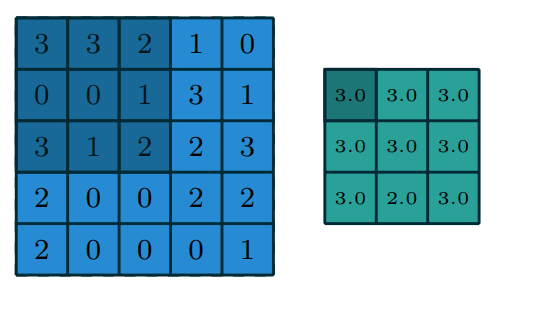

* **średnia, ang. average pooling** - średnia wartość w polu recepcyjnym

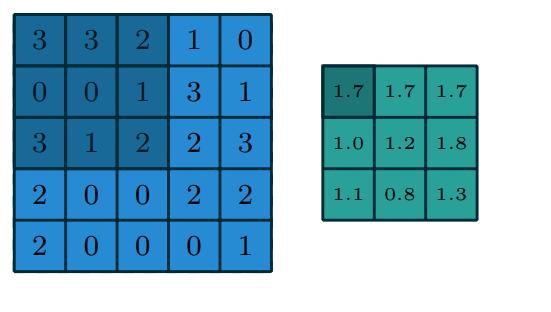

Najbardziej popularna jest warstwa wyciągająca maksimum - `MaxPooling`

Interfejs użytkownika warstwy wyciągającej maksimum w Keras:

```Python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),           # rozmiar pola recepcyjnego
    strides=None,               # wartość kroku w obu wymiarach
    padding='valid',            # sposób dopełnienia: 
                                # `valid` - brak dopełnienia
                                # `same` - dopełnienie zerami na brzegach, tak by wyjście miało ten sam rozmiar
                                #  przestrzenny, co wejście: (batch size, liczba filtrów, W, H)
    data_format=None,           # specyfikacja kolejności wymiarów: 
                                # "channels_first" - (batch size, liczba kanałów, W, H)
                                # "channels_last" - (batch size, W, H, liczba kanałów) <-- domyślne w TF
)
```

**Proszę:**

* wykonać operację `MaxPooling2D` na obrazach wyjściowych z warstwy splotowej z poprzedniej komórki z domyślnymi parametrami warstwy łączącej
* narysować wynik

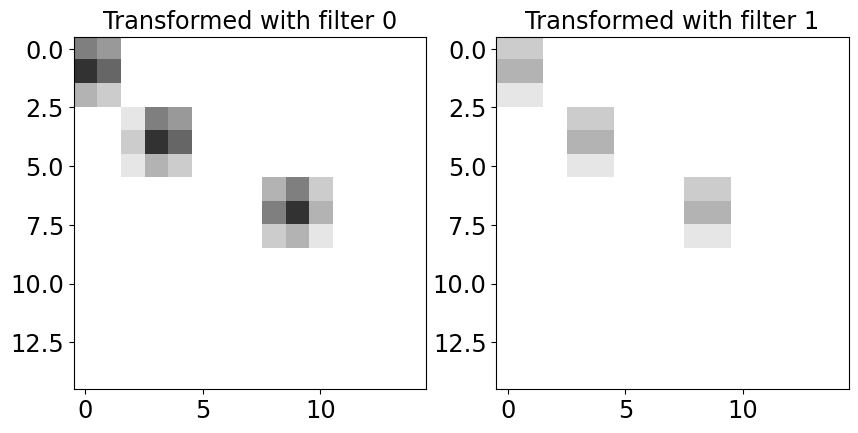

In [9]:
#BEGIN_SOLUTION
layer = tf.keras.layers.MaxPooling2D()
pool_layer_output = layer(layer_output)

fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(pool_layer_output[0,:,:,0], cmap='binary', vmin=0, vmax=10)
axes[0].set_title('Transformed with filter 0');

axes[1].imshow(pool_layer_output[0,:,:,1], cmap='binary', vmin=0, vmax=10)
axes[1].set_title('Transformed with filter 1');
#END_SOLUTION
pass

Standardowa architektura sieci analizującej obrazy zawiera przekładaniec warstw splotowych i łączących, zakończony warstwami w pełni połączonymi:

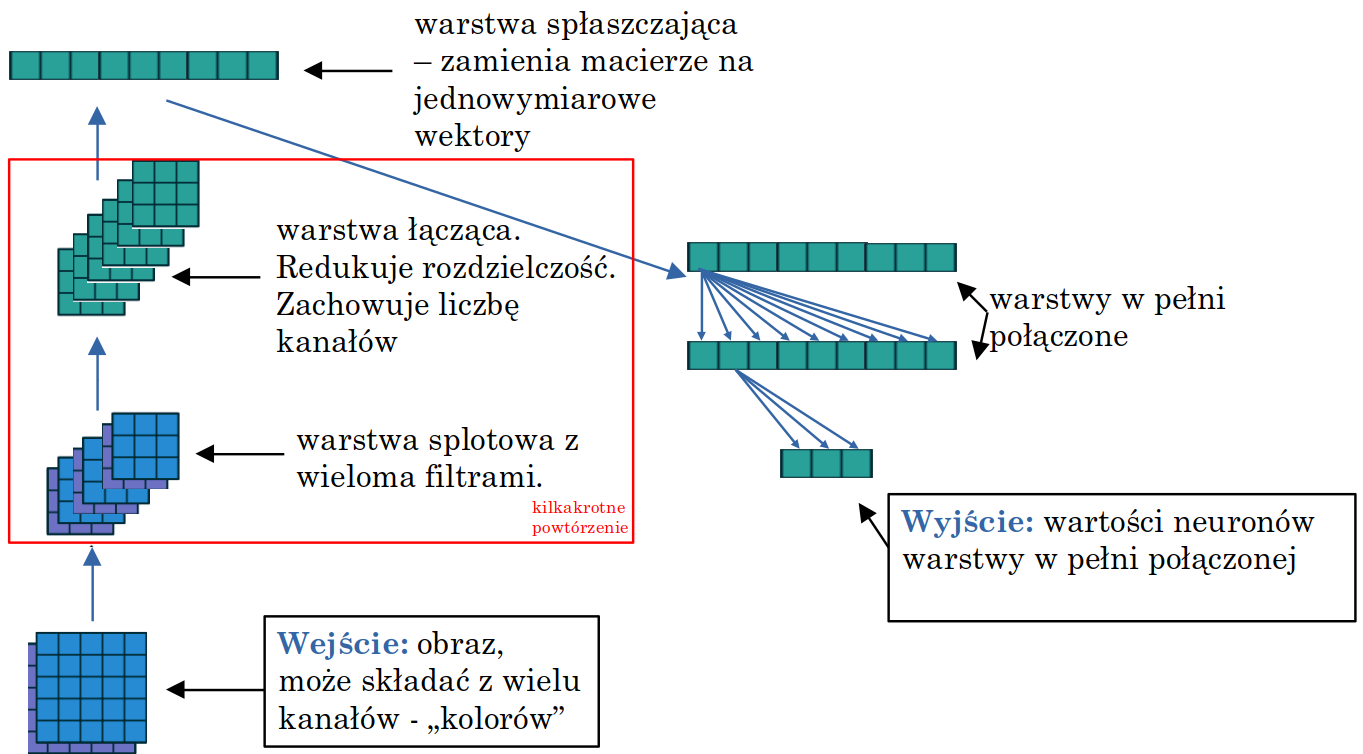

Zbiór obrazów uzyskany przez poszczególne filtry nazywany jest mapą cech, ang. `feature map`. Filtry są nazywane cechami, `features`.

## Klasa tf.keras.Sequential

Model składający się z sekwencji warstw może być stworzony przy użyciu klasy `tf.keras.Sequential`:
```Python
tf.keras.Sequential(
    layers=None, # lista warstw modelu 
    name=None    # nazwa modelu
)
```

### Składanie modelu warstwa po warstwie:

In [10]:
model = tf.keras.Sequential(name="test_1")
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(16))
model.summary()

Model: "test_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

### Definicja wielu warstw w jednym kroku:

In [11]:
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,)),                                       
                                      tf.keras.layers.Dense(16),
                                      tf.keras.layers.Dense(8)],
                             name="test_2")
model.summary()

Model: "test_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

Zbudować, korzystająć z `tf.keras.Sequential()`, sieć splotową o nazwie `CNN_Digits`` i następującej strukturze:

* kształt danych wejściowych: `(28,28,1)`
* 3$\times$ blok: 
    * warstwa `Conv2D`, `64` filtry, rozmiar filtra `3`, funkcja aktywacji: `ReLU`, padding: `same`
    * wartwa `MaxPooling`, rozmiar filtra `2`
* warstwa spłaszczająca:
```Python

tf.keras.layers.Flatten()
```

* warstwa gęsta, `128` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa gęsta, `64` neuronów, funkcja aktywacji: `ReLU`
* warstwa opuszczająca, z częstością `0.5`
* warstwa wyjściowa dobrana do zagadnienia: **Klasyfikacja ręcznie pisanych cyfr**

Oczekiwany wynik:

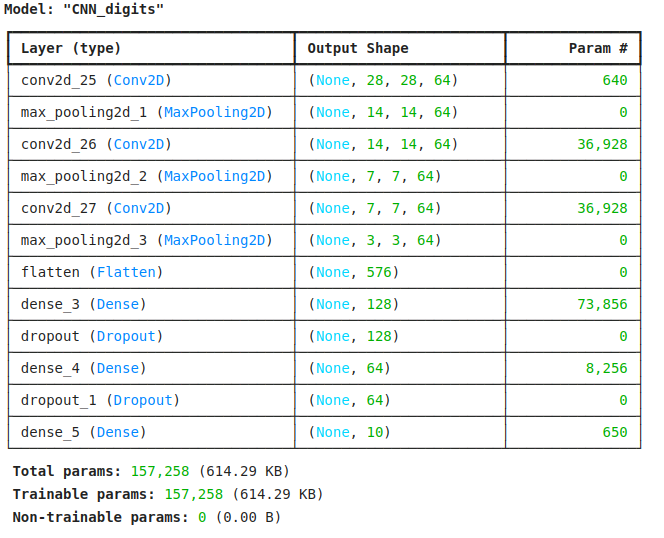

In [12]:
#BEGIN_SOLUTION
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(28,28,1)),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Flatten(),
                                      ##
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation='softmax'),
                                     ],
                                     name="CNN_digits")
model.summary()
#END_SOLUTION
pass

Model: "CNN_digits"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,258 (614.29 KB)

 Trainable params: 157,258 (614.29 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* załadować zbiór `emnist-digits-test` i podzielić go na części uczącą i walidacyjną w proporcjach `3:1`
* uzupelnić  funkcję  `trainModel(model, features, labels, nEpochs=200)` w module `emnist_functions`. Funkcja powinna wykonywać
  kroki zwiążane z treningiem:
    * ustalenie harmonogramu współczynnika uczenia
    * ustalenie wczesnego zatrzymania trenowania na podstawie monitoringu funkcji straty na zbiorze walidacyjnych
        * jako zbioru walidacyjnego używać 10% danych wydzielonych ze zbioru uczącego przez ustawienie parametru
       ```Python
       
        validation_split=0.1
        
        ```
       w wywołaniu metody  `model.fit()`
    * rysowanie zmiany funkcji straty w kolejnych epokach
    * wypisanie na ekran wydajności modelu na zbiorze uczącym
* przeprowadzić trening i sprawdzenie wydajności sieci `CNN_Digits` na zbiorze walidacyjnym

In [13]:
!pip install idx2numpy
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
!unzip gzip.zip
!gzip -d gzip/*test*

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
--2024-04-24 14:15:23--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
Resolving biometrics.nist.gov (biometrics.nist.gov)... 18.235.227.114
Connecting to biometrics.nist.gov (biometrics.nist.gov)|18.235.227.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip.3’

gzip.zip.3          100%[===================>] 535.73M  4.24MB/s    in 2m 47s  

2024-04-24 14:18:15 (3.21 MB/s) - ‘gzip.zip.3’ saved [561753746/561753746]

Archive:  gzip.zip
replace gzip/emnist-balanced-mapping.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
gzip: gzip/emnist-balanced-test-images-idx3-ubyte: unknown suffix -- ignored
gzip: gzip/emnist-balanced-test-labels-idx1-ubyte: unknown suffix -- ignored
gzip: gzip/emnist-byclass-test-ima

I0000 00:00:1713969064.671833   12414 service.cc:145] XLA service 0x7c8d44004b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713969064.671849   12414 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
I0000 00:00:1713969064.671850   12414 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2024-04-24 14:31:04.700428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713969067.385648   12414 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 8: early stopping
Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0255
Evaluation on validation dataset:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9870 - loss: 0.0608
CPU times: user 29.6 s, sys: 1.91 s, total: 31.5 s
Wall time: 19.3 s


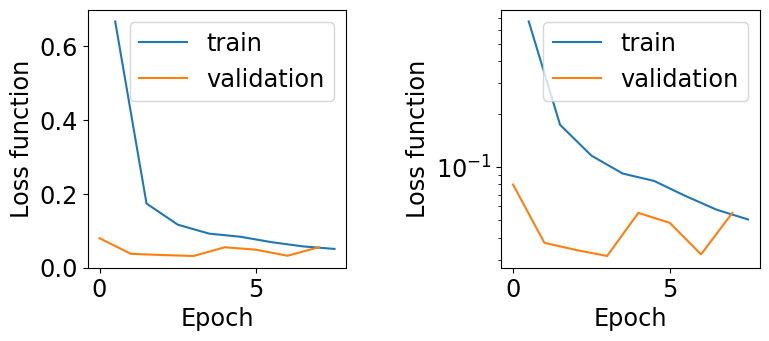

In [14]:
%%time
#BEGIN_SOLUTION
datasetName = "emnist-digits-test"
datasetPath = "../data/EMNIST/gzip/"
features, labels = emnist_fcn.getEMNIST(datasetName, datasetPath)

nTrainExamples = 30000
nValExamples = 10000
x_train = features[:nTrainExamples]
y_train = labels[:nTrainExamples]

x_val = features[-nValExamples:]
y_val = labels[-nValExamples:]

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
emnist_fcn.trainModel(model, x_train, y_train)

print(colored("Evaluation on validation dataset:","blue"))
model.evaluate(x_val, y_val)
#END_SOLUTION
pass

**Proszę:**

* narysować osiem losowych przykładów, w których odpowiedź modelu nie jest poprawna

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


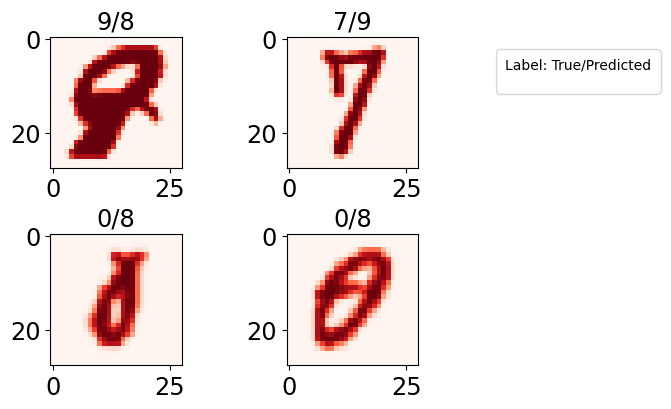

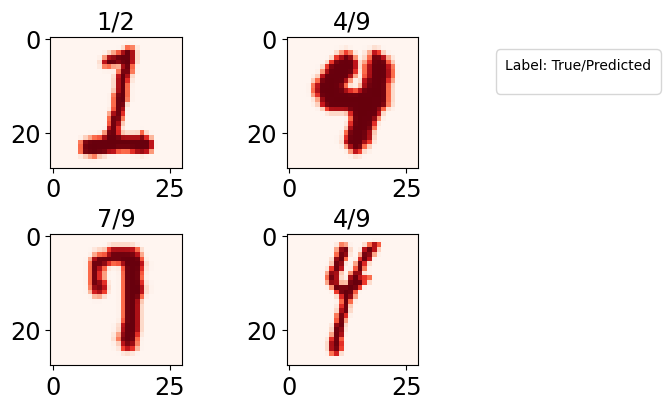

In [15]:
#BEGIN_SOLUTION
y_pred = tf.argmax(model.predict(x_val), axis=1)
mask = y_val!=y_pred
emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_pred[mask])
emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_pred[mask])
#END_SOLUTION
pass

# Zadanie domowe

Trening klasyfikatora **konwolucyjnego** na zbiorze liter i cyfr `emnist-balanced-train`.

**Proszę:**

* wybrać ze zbioru `emnist-balanced-train` przykłady z klas o numerze mniejszym niż 36 (cyfry i wielkie litery)
* zdefiniować i przeprowadzić trening modelu.
  **Kod powinien jedynie używać funkcji zdefiniowanych w komórkach
  zadania domowego i module `emnist_functions`**
* trening modelu powinien zawierać wszystkie standardowe elementy
* wypisać na ekran dokładność, `accuracy`, modelu na zbiorach treningowym i testowym
* dla zbiorów treningowego i testowego narysować macierze pomyłek z odpowiednimi etykietami na osiach
* wskazać klasy które słabo się separują
* odkodować komunikat zapisany w pliku [encoded.npz](http://studenci.fuw.edu.pl/~akalinow/encoded.npz)
    * plik zawiera macierz o kształcie `(-1,28,28)` którą można wczytać następująco:
    ```Python
    
    fileName = "encoded.npz"
    with open(fileName, 'rb') as file:
        encoded = np.load(file)
    ```
* odkodowany komunikat wypisać na ekran w postaci napisu:
```Python
Decoded message is: HELLO WORLD
```  

In [16]:
#Input data loading
#BEGIN_SOLUTION
import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);

datasetName = "emnist-byclass-train"
datasetPath = "../data/EMNIST/gzip/"
lastClassNumber = 36

x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_train = x[mask]
y_train = y[mask]

datasetName = "emnist-byclass-test"
datasetPath = "../data/EMNIST/gzip/"
x, y = emnist_fcn.getEMNIST(datasetName, datasetPath)
mask = y<lastClassNumber
x_test = x[mask]
y_test = y[mask]

nCategories = len(tf.unique(y_train)[0])

print(colored("Training data shapes:","blue"), x_train.shape, y_train.shape)
print(colored("Test data shapes:","blue"), x_test.shape, y_test.shape)
print(colored("Number of categories:","blue"),nCategories)
#END_SOLUTION
pass

Training data shapes: (533993, 28, 28) (533993,)
Test data shapes: (89264, 28, 28) (89264,)
Number of categories: 36


In [17]:
#model definition
#BEGIN_SOLUTION
model = tf.keras.Sequential(layers = [tf.keras.Input(shape=(28,28,1)),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Conv2D(64, (3), activation='relu', padding="same"),
                                      tf.keras.layers.MaxPooling2D(2),
                                      ##
                                      tf.keras.layers.Flatten(),
                                      ##
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(nCategories, activation='softmax'),
                                     ],
                                     name="CNN_letters")
model.summary()
#END_SOLUTION
pass

Model: "CNN_letters"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,948 (620.89 KB)

 Trainable params: 158,948 (620.89 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-24 14:31:31.767038: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1507139648 exceeds 10% of free system memory.


Epoch 14: early stopping
Evaluation on training dataset:


2024-04-24 14:35:44.375373: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1674602048 exceeds 10% of free system memory.


16688/16688 ━━━━━━━━━━━━━━━━━━━━ 15s 872us/step - accuracy: 0.9358 - loss: 0.1650
Evaluation on test dataset:
2790/2790 ━━━━━━━━━━━━━━━━━━━━ 3s 951us/step - accuracy: 0.9309 - loss: 0.1929
CPU times: user 4min 48s, sys: 9.74 s, total: 4min 57s
Wall time: 4min 31s


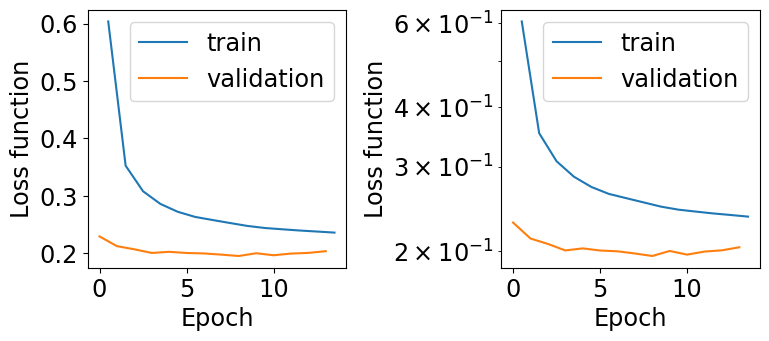

In [18]:
%%time
#model training
#BEGIN_SOLUTION
emnist_fcn.trainModel(model, x_train, y_train)
print(colored("Evaluation on test dataset:","blue"))
model.evaluate(x_test, y_test)
#END_SOLUTION
pass

2086/2086 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


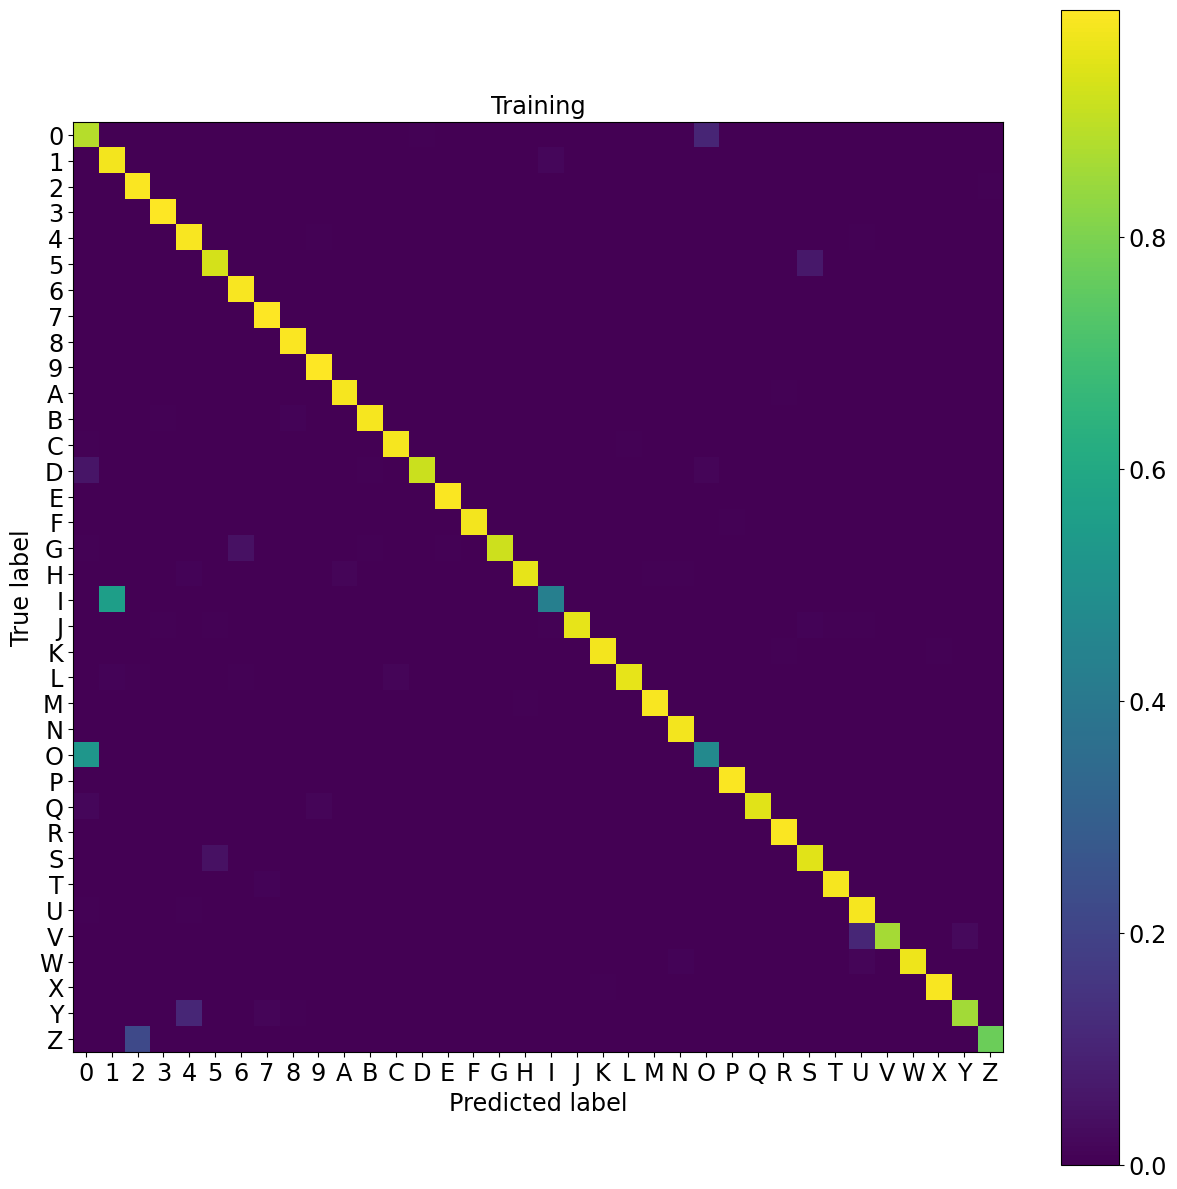

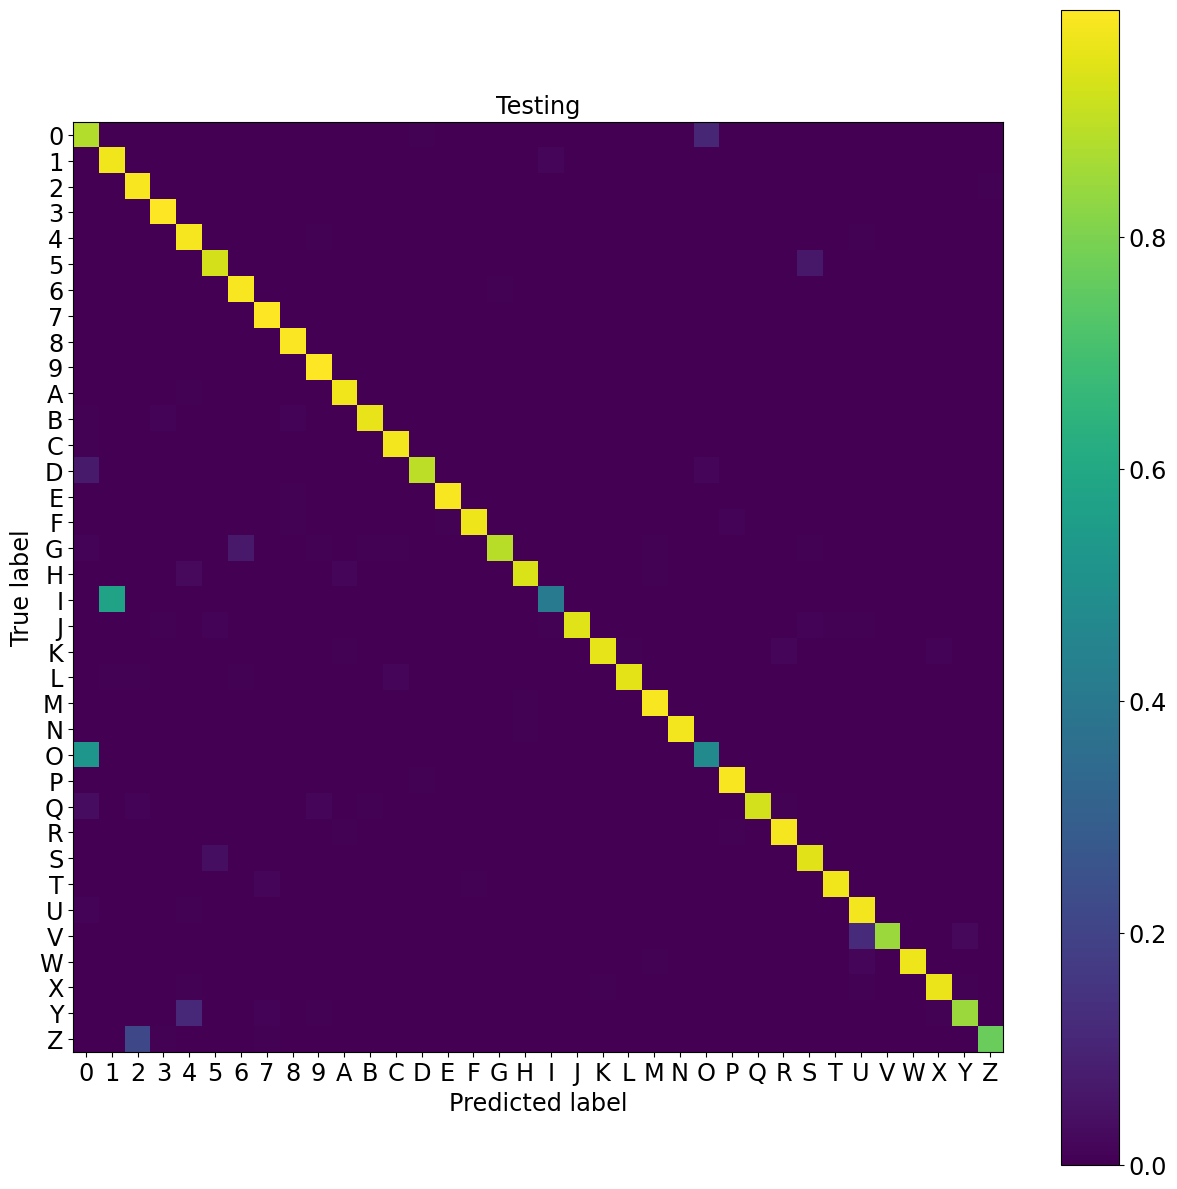

In [21]:
#evaluation
#BEGIN_SOLUTION
y_pred = tf.argmax(model.predict(x_train, batch_size=256), axis=1)
emnist_fcn.plotMNIST_CM(y_train,y_pred,"Training")

y_pred = tf.argmax(model.predict(x_test, batch_size=256), axis=1)
emnist_fcn.plotMNIST_CM(y_test,y_pred,"Testing")
#END_SOLUTION
pass

In [22]:
#message decoding
#BEGIN_SOLUTION
fileName = "../data/encoded.npz"
with open(fileName, 'rb') as file:
    encoded = np.load(file)

spaces_mask = np.sum(encoded, axis=(1,2))>0
decoded = tf.argmax(model.predict(encoded), axis=1)
digits = [str(item) for item in range(0,10)]
letters_upper = list(string.ascii_uppercase)
digits_letters = np.array(digits + letters_upper)
decoded = digits_letters[decoded]
decoded = np.where(spaces_mask, decoded, " ")
decoded = ''.join(decoded)
print(colored("Decoded message is:","blue"),decoded)
#END_SOLUTION
pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Decoded message is: TGE CAKE IS A LIE
